In [1]:
#8
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svc_clf = SVC(kernel="linear", C=C, random_state=42)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, n_iter=5000, random_state=42)

In [2]:
lin_clf.fit(X,y)
svc_clf.fit(X,y)
sgd_clf.fit(X,y)

C:\Users\quanu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.002, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=None, n_iter=5000,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
lin_clf.fit(X_scaled,y)
svc_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

C:\Users\quanu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.002, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=None, n_iter=5000,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [5]:
print("LinearSVC: " + str(lin_clf.intercept_) + ", " + str(lin_clf.coef_))
print("SVC: " + str(svc_clf.intercept_) + ", " + str(svc_clf.coef_))
print("SGDClassifier: " + str(sgd_clf.intercept_) + ", " + str(sgd_clf.coef_))

LinearSVC: [ 0.28481447], [[ 1.05541976  1.09851597]]
SVC: [ 0.31933577], [[ 1.1223101   1.02531081]]
SGDClassifier: [ 0.317], [[ 1.11945702  1.03016678]]


[[-10, 9.3484149500425548], [10, -9.8669590246752481]]


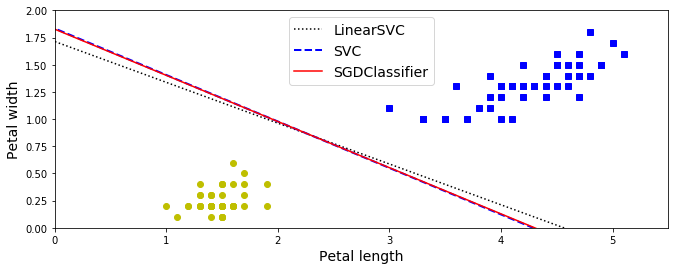

In [6]:
import matplotlib.pyplot as plt
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svc_clf.coef_[0, 0]/svc_clf.coef_[0, 1]
b2 = -svc_clf.intercept_[0]/svc_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
# How does this work?
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
print([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [7]:
#9
from sklearn.datasets import fetch_mldata
import numpy as np
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle training set
shuffle_index = np.random.permutation(60000)
# use 60000 when ready
X_train, y_train = X_train[shuffle_index[:60000]], y_train[shuffle_index[:60000]]

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42, multi_class="ovr")
lin_clf.fit(X_train, y_train)

LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [8]:
from sklearn.model_selection import cross_val_score
y_scores = cross_val_score(lin_clf, X_train, y_train, cv=3, scoring="accuracy")


In [9]:
from sklearn.model_selection import GridSearchCV
parameters = {'loss':('hinge', 'squared_hinge'), 'C':[0.1, 1, 3, 10]}
gridsearch_lin_clf = GridSearchCV(lin_clf, parameters)
gridsearch_lin_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ('hinge', 'squared_hinge'), 'C': [0.1, 1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
print(gridsearch_lin_clf.best_estimator_)
cvres = gridsearch_lin_clf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)
0.871916666667 {'C': 0.1, 'loss': 'hinge'}
0.839483333333 {'C': 0.1, 'loss': 'squared_hinge'}
0.871916666667 {'C': 1, 'loss': 'hinge'}
0.86215 {'C': 1, 'loss': 'squared_hinge'}
0.871916666667 {'C': 3, 'loss': 'hinge'}
0.865933333333 {'C': 3, 'loss': 'squared_hinge'}
0.871916666667 {'C': 10, 'loss': 'hinge'}
0.86345 {'C': 10, 'loss': 'squared_hinge'}


In [13]:
from sklearn.svm import LinearSVR
import io, os, sys, types
import pandas as pd

HOUSING_PATH = os.path.join("datasets", "housing")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

load_housing_data()

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)